In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option("display.max_colwidth", None)

In [2]:
# Adjust path depending on your structure
df = pd.read_csv("../data/raw/medquad.csv")

df.head()

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,"Glaucoma is a group of diseases that can damage the eye's optic nerve and result in vision loss and blindness. While glaucoma can strike anyone, the risk is much greater for people over 60. How Glaucoma Develops There are several different types of glaucoma. Most of these involve the drainage system within the eye. At the front of the eye there is a small space called the anterior chamber. A clear fluid flows through this chamber and bathes and nourishes the nearby tissues. (Watch the video to learn more about glaucoma. To enlarge the video, click the brackets in the lower right-hand corner. To reduce the video, press the Escape (Esc) button on your keyboard.) In glaucoma, for still unknown reasons, the fluid drains too slowly out of the eye. As the fluid builds up, the pressure inside the eye rises. Unless this pressure is controlled, it may cause damage to the optic nerve and other parts of the eye and result in loss of vision. Open-angle Glaucoma The most common type of glaucoma is called open-angle glaucoma. In the normal eye, the clear fluid leaves the anterior chamber at the open angle where the cornea and iris meet. When fluid reaches the angle, it flows through a spongy meshwork, like a drain, and leaves the eye. Sometimes, when the fluid reaches the angle, it passes too slowly through the meshwork drain, causing the pressure inside the eye to build. If the pressure damages the optic nerve, open-angle glaucoma -- and vision loss -- may result. There is no cure for glaucoma. Vision lost from the disease cannot be restored. However, there are treatments that may save remaining vision. That is why early diagnosis is important. See this graphic for a quick overview of glaucoma, including how many people it affects, whos at risk, what to do if you have it, and how to learn more. See a glossary of glaucoma terms.",NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a leading cause of blindness in the United States. Although anyone can get glaucoma, some people are at higher risk. They include - African-Americans over age 40 - everyone over age 60, especially Hispanics/Latinos - people with a family history of glaucoma. African-Americans over age 40 everyone over age 60, especially Hispanics/Latinos people with a family history of glaucoma. In addition to age, eye pressure is a risk factor. Whether you develop glaucoma depends on the level of pressure your optic nerve can tolerate without being damaged. This level is different for each person. Thats why a comprehensive dilated eye exam is very important. It can help your eye care professional determine what level of eye pressure is normal for you. Another risk factor for optic nerve damage relates to blood pressure. Thus, it is important to also make sure that your blood pressure is at a proper level for your body by working with your medical doctor. (Watch the animated video to learn more about the causes of glaucoma. To enlarge the video, click the brackets in the lower right-hand corner. To reduce the video, press the Escape (Esc) button on your keyboard.)",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,"Symptoms of Glaucoma Glaucoma can develop in one or both eyes. The most common type of glaucoma, open-angle glaucoma, has no symptoms at first. It causes no pain, and vision seems normal. Without treatment, people with glaucoma will slowly lose their peripheral, or side vision. They seem to be looking through a tunnel. Over time, straight-ahead vision may decrease until no vision remains. Tests for Glaucoma Glaucoma is detected through a comprehensive eye exam that includes a visual acuity test, visual field test, dilated eye exam, tonometry, and pachymetry. (Watch the animated video to learn more about testing for glaucoma. To enlarge the video, click the brackets in the lower right-hand corner. To reduce the video, press the Escape (Esc) button on your k

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16412 entries, 0 to 16411
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   question    16412 non-null  object
 1   answer      16407 non-null  object
 2   source      16412 non-null  object
 3   focus_area  16398 non-null  object
dtypes: object(4)
memory usage: 513.0+ KB


In [4]:
df[['question', 'answer']].sample(5)

,question,answer
12101,How many people are affected by phosphoglycerate kinase deficiency ?,Phosphoglycerate kinase deficiency appears to be a rare disorder. About 30 families with affected members have been reported in the scientific literature.
12948,Is biotin-thiamine-responsive basal ganglia disease inherited ?,"This condition is inherited in an autosomal recessive pattern, which means both copies of the gene in each cell have mutations. The parents of an individual with an autosomal recessive condition each carry one copy of the mutated gene, but they typically do not show signs and symptoms of the condition."
4041,What is (are) LEOPARD syndrome ?,"LEOPARD syndrome is an inherited condition characterized by abnormalities of the skin, heart, inner ears, and genitalia. The acronym LEOPARD describes the characteristic features associated with this condition: (L)entigines (multiple dark spots on the skin; (E)lectrocardiographic conduction defects (abnormalities of the electrical activity of the heart); (O)cular hypertelorism (widely spaced eyes); (P)ulmonary stenosis (obstruction of the normal outflow of blood from the right ventricle of the heart); (A)bnormalities of the genitalia; (R)etarded growth resulting in short stature; and (D)eafness or hearing loss. There are three types of LEOPARD syndrome, which are distinguished by their underlying genetic cause. LEOPARD syndrome type 1 is caused by mutations in the PTPN11 gene; type 2 is caused by mutations in the RAF1 gene; and type 3 is caused by mutations in the BRAF gene. Some cases are inherited from a parent in an autosomal dominant pattern. Other times, LEOPARD syndrome occurs in people without a family history of the condition due to a new gene mutation."
15970,Who is at risk for Renal Artery Stenosis? ?,"People at risk for artherosclerosis are also at risk for RAS. Risk factors for RAS caused by artherosclerosis include\n \n- high blood cholesterol levels - high blood pressure - smoking - insulin resistance - diabetes - being overweight or obese - lack of physical activity - a diet high in fat, cholesterol, sodium, and sugar - being a man older than 45 or a woman older than 55 - a family history of early heart disease\n \nThe risk factors for RAS caused by FMD are unknown, but FMD is most common in women and people 25 to 50 years of age.3 FMD can affect more than one person in a family, indicating that it may be caused by an inherited gene."
7427,What is (are) Leukoplakia ?,"Leukoplakia is a condition in which thickened, white patches form on the tongue, gums, inside of the cheek, or sometimes on the outer female genitals. Although the sores can vary in appearance, they are usually white or gray; thick; and slightly raised with a hard surface. The condition is thought to be caused by irritation, but the cause is not always known. Tobacco is considered to be the main cause of its development in the mouth. Most patches are benign, but a small percentage show early signs of cancer. Removing the source of irritation may cause the condition to go away, but surgery to remove the sore(s) may be necessary in some cases."


In [5]:
df.isna().sum()

question       0
answer         5
source         0
focus_area    14
dtype: int64

In [6]:
df['q_len'] = df['question'].astype(str).str.len()
df['a_len'] = df['answer'].astype(str).str.len()

df[['q_len', 'a_len']].describe()

,q_len,a_len
count,16412.000000,16412.000000
mean,50.684438,1303.056483
std,16.925355,1656.597408
min,16.000000,3.000000
25%,38.000000,487.000000
50%,48.000000,889.500000
75%,61.000000,1589.000000
max,191.000000,29046.000000


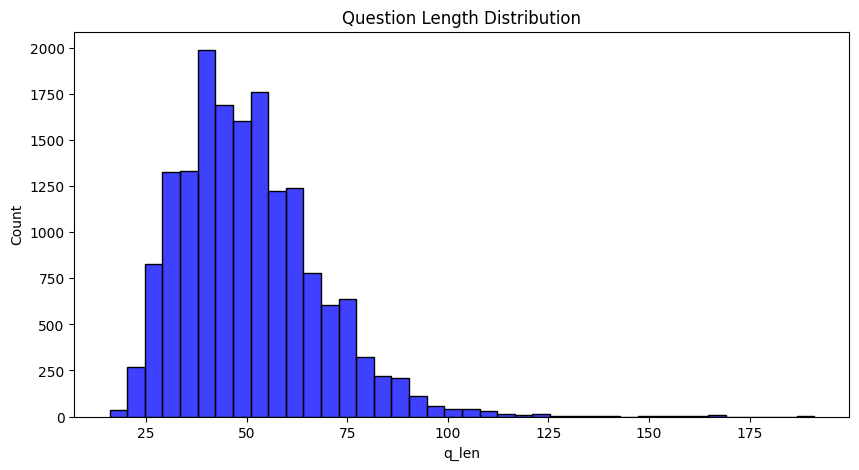

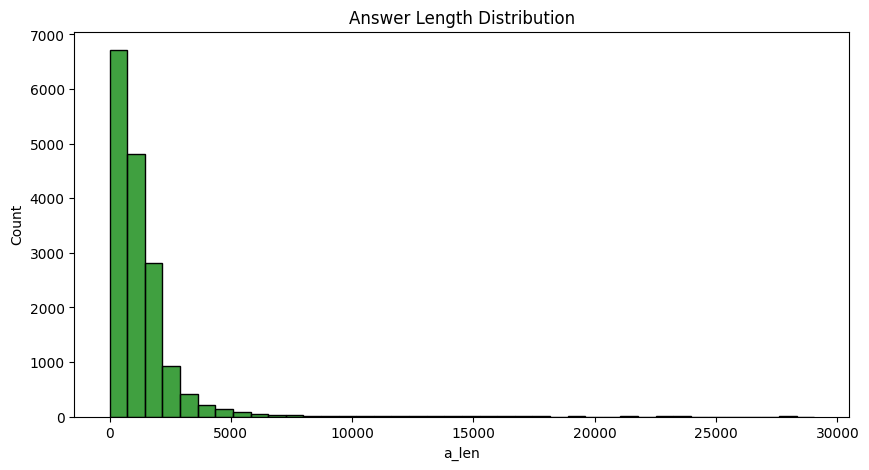

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(df['q_len'], bins=40, color='blue')
plt.title("Question Length Distribution")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['a_len'], bins=40, color='green')
plt.title("Answer Length Distribution")
plt.show()

In [8]:
import spacy

# Load biomedical NER model installed earlier
nlp = spacy.load("en_ner_bc5cdr_md")

print("Model loaded successfully!")

/Users/dhruvyellanki/Documents/Projects/BioGraphX/venv/lib/python3.10/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.5.1) was trained with spaCy v3.4.1 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Model loaded successfully!


In [9]:
doc = nlp("Acetaminophen reduces fever and pain. It is often used for headaches.")

[(ent.text, ent.label_) for ent in doc.ents]

[('Acetaminophen', 'CHEMICAL'),
 ('fever', 'DISEASE'),
 ('pain', 'DISEASE'),
 ('headaches', 'DISEASE')]

In [10]:
sample_q = df['question'].sample(1).iloc[0]
sample_a = df['answer'].sample(1).iloc[0]

print("QUESTION:", sample_q)
print("ANSWER:", sample_a)

doc_q = nlp(sample_q)
doc_a = nlp(sample_a)

entities_q = [(ent.text, ent.label_) for ent in doc_q.ents]
entities_a = [(ent.text, ent.label_) for ent in doc_a.ents]

print("\nEntities in Question:", entities_q)
print("Entities in Answer:", entities_a)

QUESTION: What are the symptoms of Von Willebrand Disease ?
ANSWER: What are the signs and symptoms of Microphthalmia syndromic 9? The Human Phenotype Ontology provides the following list of signs and symptoms for Microphthalmia syndromic 9. If the information is available, the table below includes how often the symptom is seen in people with this condition. You can use the MedlinePlus Medical Dictionary to look up the definitions for these medical terms. Signs and Symptoms Approximate number of patients (when available) Aplasia/Hypoplasia affecting the eye 90% Cognitive impairment 90% Abnormal lung lobation 50% Aplasia/Hypoplasia of the lungs 50% Congenital diaphragmatic hernia 50% Abnormal localization of kidney 7.5% Abnormality of female internal genitalia 7.5% Abnormality of the larynx 7.5% Abnormality of the spleen 7.5% Annular pancreas 7.5% Aplasia/Hypoplasia of the pancreas 7.5% Cryptorchidism 7.5% Duodenal stenosis 7.5% Intrauterine growth retardation 7.5% Low-set, posteriorly 